In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

fields = ['LSOA code','Crime type','datetime','force']
df_crimes = pd.read_csv('../crime_street_test.csv', usecols=fields)

In [2]:
df_urban = pd.read_csv('Rural_Urban_conv.csv')
df_crimes=df_crimes.merge(df_urban, how='inner', on='LSOA code')
df_crimes.head()

,LSOA code,Crime type,datetime,force,Urban
0,E01020634,Shoplifting,2018-10-01,durham,0
1,E01020634,Shoplifting,2018-10-01,durham,0
2,E01020634,Shoplifting,2018-10-01,durham,0
3,E01020634,Shoplifting,2018-10-01,durham,0
4,E01020634,Violence and sexual offences,2018-10-01,durham,0


In [6]:
df_crimes.columns

Index(['LSOA code', 'Crime type', 'datetime', 'force', ' Urban '], dtype='object')

In [36]:
df_crimes_urban = df_crimes.loc[df_crimes[' Urban '] == 1]
df_crimes_rural = df_crimes.loc[df_crimes[' Urban '] == 0]
df_crimes_urban.head()

,LSOA code,Crime type,datetime,force,Urban
254,E01020654,Anti-social behaviour,2018-10-01,durham,1
255,E01020654,Anti-social behaviour,2018-10-01,durham,1
256,E01020654,Burglary,2018-10-01,durham,1
257,E01020654,Criminal damage and arson,2018-10-01,durham,1
258,E01020654,Criminal damage and arson,2018-10-01,durham,1


In [37]:
df_types_urban = df_crimes_urban.groupby('Crime type').count()
df_types_rural = df_crimes_rural.groupby('Crime type').count()


In [38]:
df_types_urban.drop(columns='datetime', axis=1, inplace=True)
df_types_urban.drop(columns='force', axis=1, inplace=True)
df_types_urban.drop(columns=' Urban ', axis=1, inplace=True)
df_types_rural.drop(columns='datetime', axis=1, inplace=True)
df_types_rural.drop(columns='force', axis=1, inplace=True)
df_types_rural.drop(columns=' Urban ', axis=1, inplace=True)
df_types_rural.head()
df_types_urban.head()

,LSOA code
Crime type,
Anti-social behaviour,1216755
Bicycle theft,89910
Burglary,363217
Criminal damage and arson,490686
Drugs,127030


In [39]:
df_types_all = df_types_urban.merge(df_types_rural, on='Crime type')

In [40]:
df_types_all.head()

,LSOA code_x,LSOA code_y
Crime type,,
Anti-social behaviour,1216755,130806
Bicycle theft,89910,3121
Burglary,363217,51661
Criminal damage and arson,490686,61592
Drugs,127030,9918


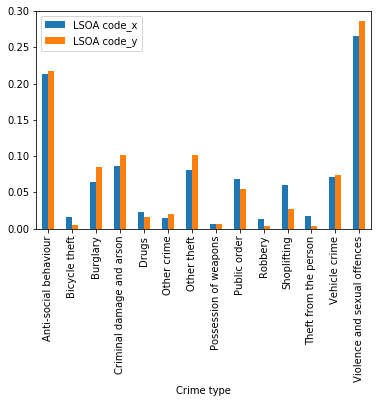

In [41]:
u_sum = df_types_all['LSOA code_x'].sum()
r_sum = df_types_all['LSOA code_y'].sum()
df_types_all['LSOA code_x'] = df_types_all['LSOA code_x'].apply(lambda x: x/u_sum)
df_types_all['LSOA code_y'] = df_types_all['LSOA code_y'].apply(lambda x: x/r_sum) 


Text(0,0.5,'Fraction of crimes')

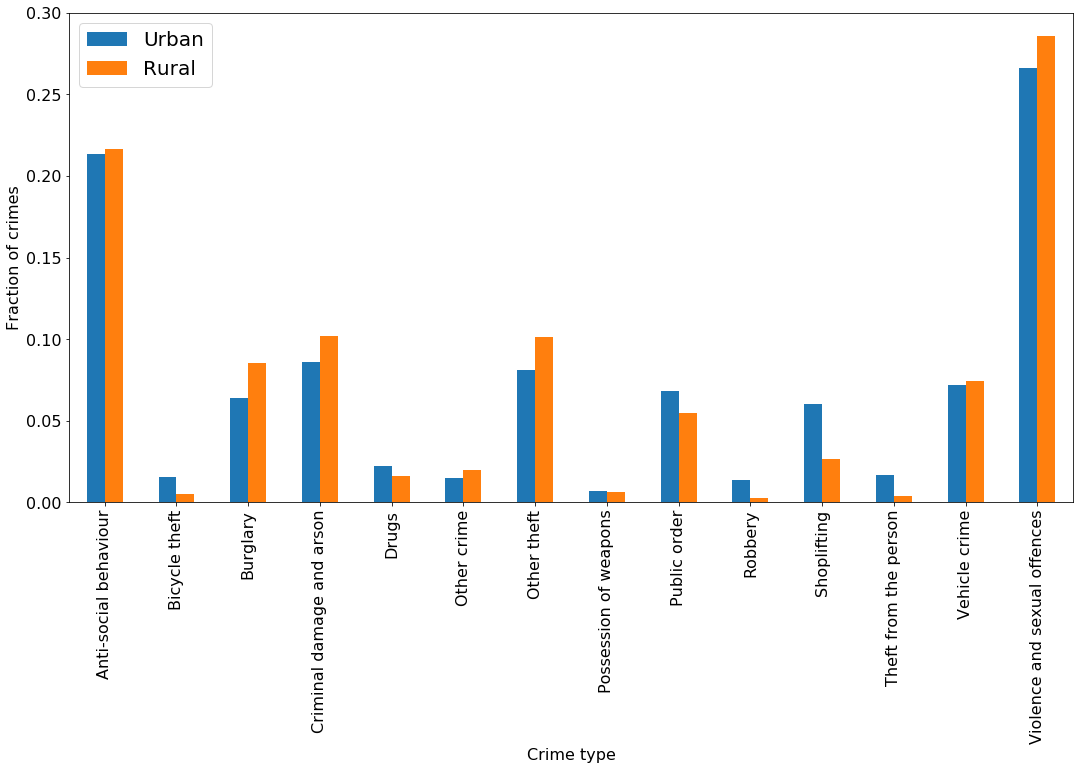

In [82]:
#df_types_all.rename(columns={'LSOA code_x':'Urban'}, inplace=True)
#df_types_all.rename(columns={'LSOA code_y':'Rural'}, inplace=True)
    
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['legend.fontsize'] = 20


fig = plt.figure(figsize=(18, 9))
ax = fig.add_subplot(111)
df_types_all.plot.bar(ax=ax)
ax.set_ylabel('Fraction of crimes')


In [72]:
fig.savefig('Urban_Rural')

In [62]:
print('total crimes = ' + str(u_sum+r_sum))

total crimes = 6311117


In [63]:
u_sum

5707162

In [64]:
r_sum

603955